<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simpson's rule is very helpful for integrating.  The Riemann integral approximates the value within a small region with just a constant, effectively making it a rectangle.  The trapezoid method uses a straight line (linear function) to approximate the value within the region.  Simpson's rule takes this one step further by using a quadratic function.  A quadratic function has 3 coefficients, so trying to find 1 quadratic function for 1 region actually has infinitely many solutions, since there are only 2 points of interest.  Using 2 regions at a time though, there is only 1 quadratic function to pass through all 3 relevant points.

Now, to use Simpsons rule for the whole range over which you're integrating, you need to divide it into pairs.  This is only possible with an even number of regions, and therefore, an odd number of points.

Again, h is the width of each subregion.  We want to find the approximate area under the curve between x_i-1 and x_i+1.  Using Lagrange polynomials and the easy integral of quadratic functions, we eventually find the area is approximately (h/3)(f(x_i-1) +4f(x_i) +f(x_i+1)).  This is only for 1 pair of regions.  To integrate from a to b, with n points, we take a sum for all pairs, and eventually end up with the following:

(h/3)(f(x_0) + 4(sum from i=1 to n-1 for odd i of f(x_i)) +  
2(sum from i=2 to n-2 for even i of f(x_i)) + f(x_n))

Simpson's rule has an error on the order of O(h^4), which means when you cut h in half, it gets 16 times smaller error, which is of course very good, especially with how simple it is.  Now we will demonstrate just how good it is, using python.

8.429015536854193e-16


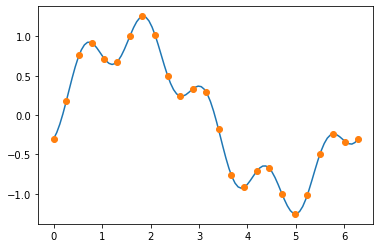

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# We will have 25 points, which means 24 regions.
n = 25

# x and y are only for graphing
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x) - 0.3*np.cos(5*x)

# x2 and y2 are used for calculations, which is why they each have n elements.
# y is the function f(x) = sin(x) - 0.3cos(5x)
x2 = np.linspace(0, 2*np.pi, n)
y2 = np.sin(x2) - 0.3*np.cos(5*x2)

# calculate step size
h = 2*np.pi/(n-1)

# sum the even elements and odd elements
s1 = sum(y2[1:n-1:2])
s2 = sum(y2[2:n-2:2])

# calculate the final approximation with the formula
total = y2[0] + 4*s1 + 2*s2 + y2[n-1]
total = total*h/3

# the exact answer should be 0, so the approximated value is also the error.
# it's pretty much nothing, meaning this is a really good approximation.
print(total)

# The blue is the graph of the function, and the orange represents the only
# points that we actually end up using values from in our calculation.
# Even just having the orange points, Simpson's rule gave us an extremely good
# approximation of what the actual function is like.
plt.plot(x,y)
plt.plot(x2,y2, 'o')

A way we integrate things in python is with scipy's trapz function.

In [55]:
import numpy as np
from scipy.integrate import trapz

n = 33
h = 2*np.pi/(n-1)

x = np.linspace(0, 2*np.pi, n)
y = np.sin(x) - 0.3*np.cos(5*x)

# We can see that doing trapezoid method by hand is very close to using trapz.

print((h/2)*(y[0] + 2 * sum(y[1:n-1]) + y[n-1]))
print(trapz(y,x))

2.2889137018181647e-16
7.632783294297951e-17


Another technique is to take an indefinite integral.  This actually creates a new function that tells you integral values for various arguments.

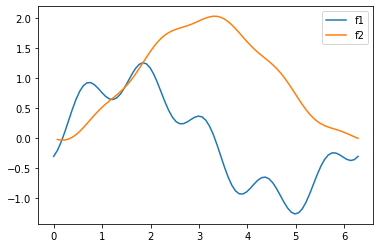

In [63]:
import numpy as np
from scipy.integrate import cumtrapz

n = 83
h = 2*np.pi/(n-1)

x = np.linspace(0, 2*np.pi, n)
y = np.sin(x) - 0.3*np.cos(5*x)

# cumtrapz returns an array with 1 less element
# so we remove the first from x in order to graph it.
x2 = x[1::]
y2 = cumtrapz(y,x)

# We can see that f1 is the derivative (slope) of f2
# Which also means f2 is the integral (area) of f1.
plt.plot(x,y)
plt.plot(x2,y2)
plt.legend(["f1", "f2"])

Another way to integrate is scipy's quad.

In [66]:
import numpy as np
from scipy.integrate import quad

def f(x):
  return np.sin(x) - 0.3*np.cos(5*x)

print(quad(f, 0, 2*np.pi))

# It gives an array with the value and the estimated error.


(4.440892098500626e-16, 4.618527782440651e-14)
